In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import rslaser
import scipy.optimize as opt

In [2]:
def gaussian(params, amplitude, xo, yo, sigma):
    xo = float(xo)
    yo = float(yo)
    r = np.sqrt((params[0] - xo)**2 + (params[1] - yo)**2)
    g = amplitude * np.exp(-(r/sigma)**2)
    return g.ravel()

In [3]:
image_file_name = 'basler_532nm_pump.bmp'
package_data_dir = rslaser.pkg_resources.resource_filename('rslaser','package_data')
path_to_file = os.path.join(package_data_dir, image_file_name)
image = Image.open(path_to_file)
img_orig = np.array(image)

In [4]:
print('np.shape(img_orig) = ', np.shape(img_orig))
print('min_orig = ', np.min(img_orig))
print('max_orig = ', np.max(img_orig))

x = np.linspace(0, img_orig.shape[1] - 1, img_orig.shape[1])
y = np.linspace(0, img_orig.shape[0] - 1, img_orig.shape[0])
x, y = np.meshgrid(x, y)

initial_guess = (3, 300, 300, 10)
popt, pcov = opt.curve_fit(gaussian, (x, y), img_orig.flatten(), p0=initial_guess, maxfev=10000)
img_fit = gaussian((x, y), *popt).reshape(img_orig.shape)

np.shape(img_orig) =  (540, 720)
min_orig =  6
max_orig =  175


In [5]:
_max = popt[0]
_rx = popt[1]
_ry = popt[2]
_sig = popt[3]
print('_max = ', _max)
print('_sig = ', _sig)

_max =  152.76981032305295
_sig =  187.1750282306478


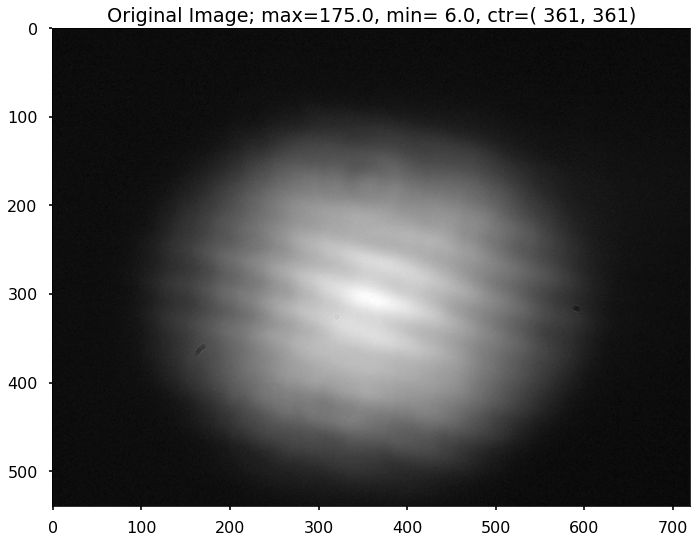

In [6]:
# plot twoD_Gaussian data generated above
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_orig, cmap='gray', vmin=np.min(img_orig), vmax=np.max(img_orig))
    ax.set_title('Original Image; max={0:4.1f}'.format(np.max(img_orig))+', min={0:4.1f}'.format(np.min(img_orig))+', ctr=({0:4.0f},{0:4.0f})'.format(_rx,_ry))

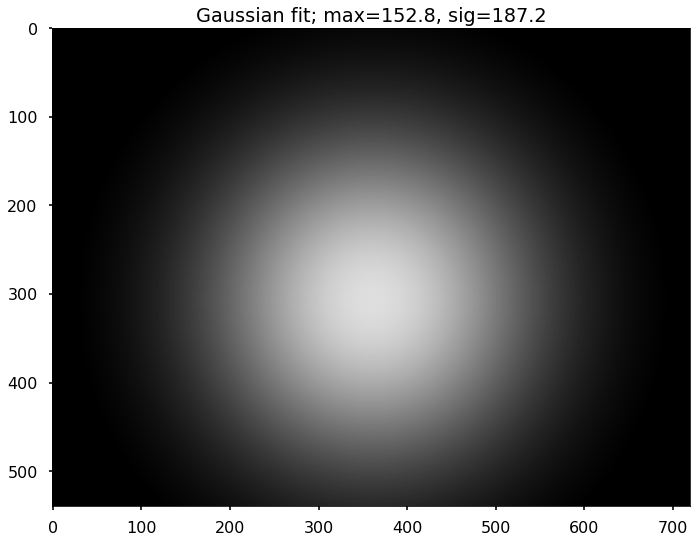

In [7]:
# plot twoD_Gaussian data generated above
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_fit, cmap='gray', vmin=np.min(img_orig), vmax=np.max(img_orig))
    ax.set_title('Gaussian fit; max={0:4.1f}, '.format(_max)+'sig={0:4.1f}'.format(_sig))

min_diff =  -22.53570207328608
max_diff =  22.27866445056617
relative deviation (above) =  12.730665400323524 %
relative deviation (below) =  12.877544041877762 %


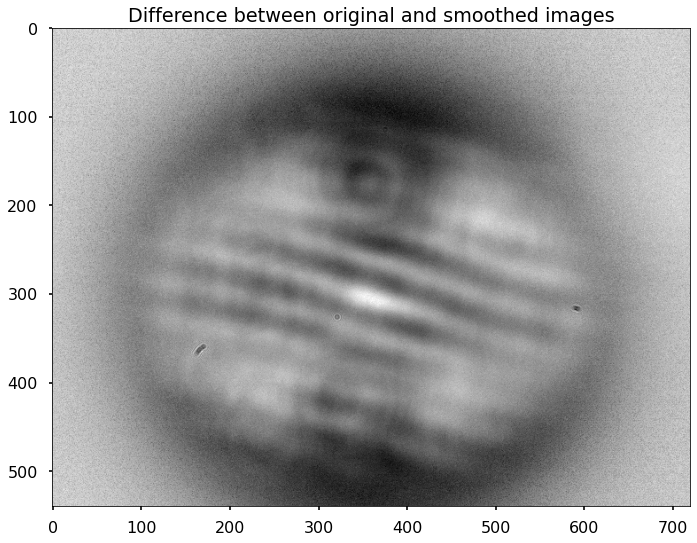

In [8]:
img_diff = img_orig - img_fit

print('min_diff = ', np.min(img_diff))
print('max_diff = ', np.max(img_diff))
    
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_diff, cmap='gray', vmin=np.min(img_diff), vmax=np.max(img_diff))
    ax.set_title("Difference between original and smoothed images")

print('relative deviation (above) = ', 100.*(np.max(img_diff)/np.max(img_orig)), '%')
print('relative deviation (below) = ', 100.*(abs(np.min(img_diff))/np.max(img_orig)), '%')

In [9]:
print(' ')
print('*************************')
print('img_orig = ')
print(img_orig)
min_orig = np.min(img_orig)
max_orig = np.max(img_orig)
print(' ')
print('min original = ', min_orig)
print('max original = ', max_orig)

print(' ')
print('*************************')
print('img_fit = ')
print(img_fit)
min_fit = np.min(img_fit)
max_fit = np.max(img_fit)
print(' ')
print('min fitted = ', min_fit)
print('max fitted = ', max_fit)

print(' ')
print('*************************')
print('img_diff = ')
print(img_diff)
min_diff = np.min(img_diff)
max_diff = np.max(img_diff)
print(' ')
print('min diff = ', min_diff)
print('max diff = ', max_diff)

 
*************************
img_orig = 
[[15 17 12 ... 12 12 15]
 [12 15 15 ... 15 15 15]
 [15 12 15 ... 17 12 12]
 ...
 [12 15  9 ... 12 15 15]
 [15 15 15 ... 15 15 12]
 [15 15 15 ...  9 12 12]]
 
min original =  6
max original =  175
 
*************************
img_fit = 
[[0.25072025 0.2559321  0.26123738 ... 0.27667739 0.27110209 0.26562398]
 [0.25514929 0.26045321 0.26585221 ... 0.28156497 0.27589118 0.2703163 ]
 [0.25964175 0.26503905 0.27053311 ... 0.28652253 0.28074885 0.2750758 ]
 ...
 [0.82229087 0.83938426 0.85678406 ... 0.90742288 0.8891375  0.87117085]
 [0.81155303 0.8284232  0.84559579 ... 0.89557334 0.87752674 0.85979471]
 [0.80090969 0.81755861 0.83450598 ... 0.88382809 0.86601816 0.84851869]]
 
min fitted =  0.25072025149452576
max fitted =  152.76951011237668
 
*************************
img_diff = 
[[14.74927975 16.7440679  11.73876262 ... 11.72332261 11.72889791
  14.73437602]
 [11.74485071 14.73954679 14.73414779 ... 14.71843503 14.72410882
  14.7296837 ]
 [14.74035